In [1]:
pip install pandas numpy scikit-learn factor-analyzer matplotlib seaborn

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 131.3 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.8 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 208.9 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=fc3a0fd24e561c0b673949723c122e6c35f40609cd12fa80ad1359fbaa504f70
  Stored in directory: c:\users\spurge\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
survey_df = pd.read_csv('C:\\Users\\SPURGE\\Desktop\\SCMA\\A4\\Survey.csv')

In [4]:
# Display basic information about the dataset
print("Dimensions of the dataset:", survey_df.shape)
print("Column names:", survey_df.columns)
print("First few rows of the dataset:\n", survey_df.head())
print("Structure of the dataset:\n", survey_df.info())


Dimensions of the dataset: (70, 50)
Column names: Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
   

In [5]:
# Check for missing values
print("Number of missing values in the dataset:", survey_df.isna().sum().sum())

Number of missing values in the dataset: 0


In [6]:
# Selecting the relevant columns for analysis
sur_int = survey_df.iloc[:, 19:46]
print("Dimensions of the selected data:", sur_int.shape)

Dimensions of the selected data: (70, 27)


In [7]:
# Standardize the data before PCA
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)


In [8]:
# Perform PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int_scaled)


In [9]:
# Explained variance by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.31822766 0.09526344 0.06889323 0.06341429 0.06111318]
Cumulative explained variance ratio: [0.31822766 0.4134911  0.48238432 0.54579862 0.6069118 ]


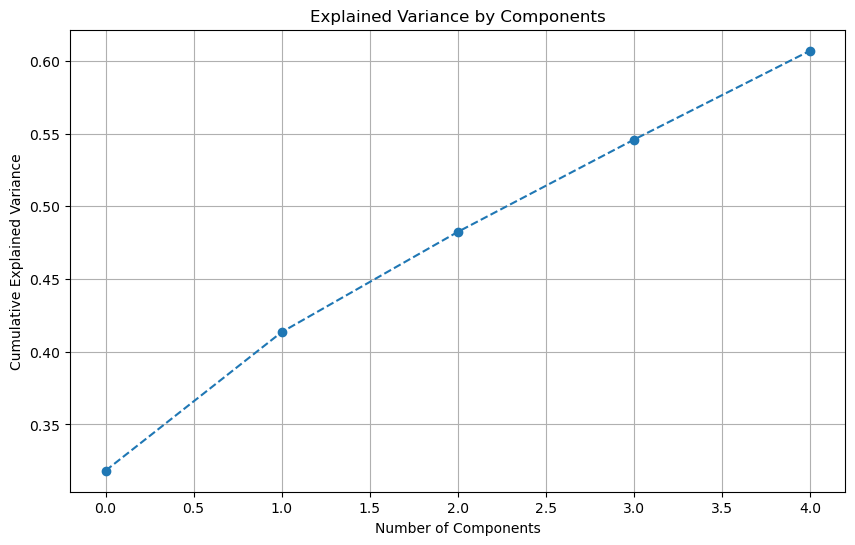

In [10]:
# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [11]:
# Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation='promax')
fa.fit(sur_int_scaled)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [12]:
# Factor loadings
loadings = fa.loadings_
print("Factor loadings:\n", loadings)

Factor loadings:
 [[-6.26497249e-02  5.34488613e-02  1.02690935e-01  5.66766311e-01
  -1.08953466e-01]
 [ 2.14466440e-01 -2.42324026e-01 -1.56117211e-02 -5.96429859e-02
   6.57571574e-01]
 [ 2.39691368e-02  6.46406001e-01  2.73362375e-01 -1.18424856e-01
   1.70156039e-01]
 [ 3.55079734e-02  4.97715553e-01 -1.23070184e-01  1.75301020e-01
   1.43681447e-01]
 [ 1.41555022e-01  4.58574228e-01 -1.52465979e-01 -3.40737251e-02
   1.44277307e-01]
 [ 3.38511384e-02  3.24155778e-01  2.58810602e-02 -1.00512054e-01
   5.58963374e-01]
 [ 3.34491864e-01  2.95377636e-01  3.23026329e-02  6.17495225e-01
   1.06282878e-01]
 [-2.47295379e-01  9.63297187e-01 -8.31312360e-02  3.19566591e-01
  -1.38278260e-01]
 [ 3.57561511e-01  4.13705724e-01  2.86870135e-01 -4.04234537e-01
  -1.26285935e-01]
 [ 3.07274312e-01 -8.66436360e-02 -9.66132248e-02 -3.99986062e-02
  -2.98122149e-01]
 [ 4.08980899e-01  3.85737783e-01 -4.60642244e-02 -1.09581503e-01
   1.03988260e-01]
 [ 5.74897485e-01  7.29136422e-02 -7.79075442e-

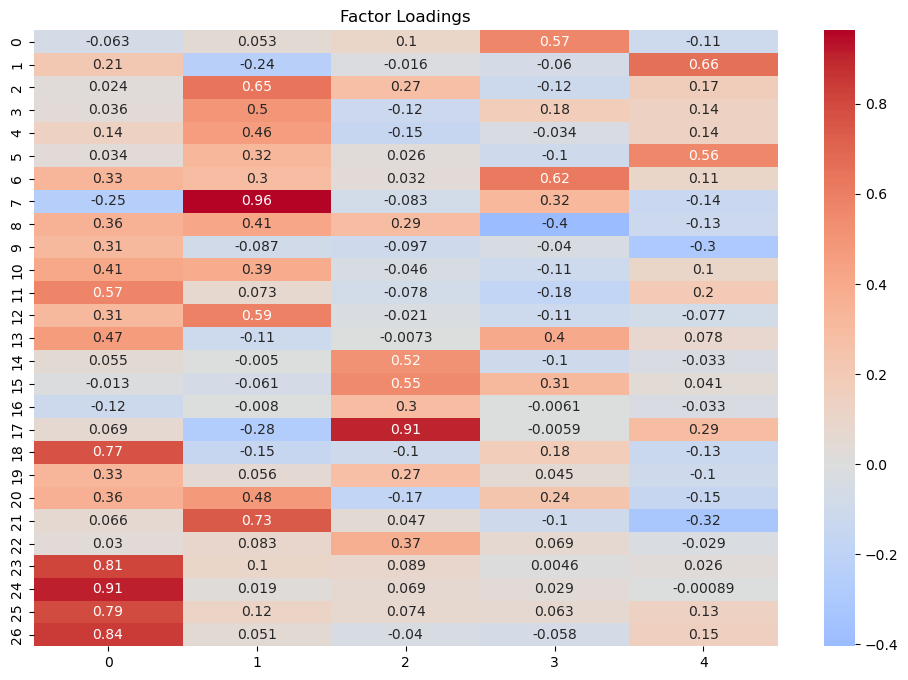

In [13]:
# Plotting the factor loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings')
plt.show()

In [14]:
# Eigenvalues
ev, v = fa.get_eigenvalues()
print("Eigenvalues:\n", ev)

Eigenvalues:
 [8.59214681 2.57211281 1.8601171  1.71218596 1.65005587 1.35764516
 1.28618509 1.04216385 0.93653127 0.79863128 0.73574426 0.61407821
 0.55277452 0.53292558 0.50862436 0.40155421 0.33881518 0.29791177
 0.27864365 0.23229769 0.20266837 0.14516714 0.11998814 0.09516032
 0.06000245 0.04985677 0.02601221]


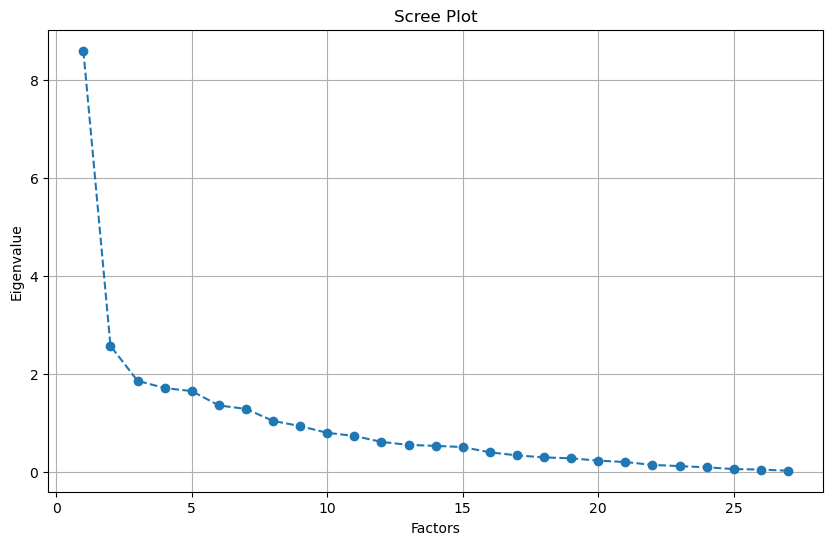

In [15]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()